In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
! git clone https://github.com/askmuhsin/eva_training_flow

Cloning into 'eva_training_flow'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 121 (delta 64), reused 85 (delta 37), pack-reused 0
Receiving objects: 100% (121/121), 382.79 KiB | 0 bytes/s, done.
Resolving deltas: 100% (64/64), done.
Checking connectivity... done.


In [4]:
import sys
sys.path.append('./eva_training_flow/')

In [6]:
from main import Trainer, show_misclassification
from models import resnet_v2_6ch_ending

try:
    import wandb
except ModuleNotFoundError as e:
    print(e, 'Logging module failed to import !')

epochs = 40

[INFO] seed set 1
[INFO] Cuda Avaliable :  True
[INFO] device :  cuda


## Resnet with 6X6 channel size ending

In [10]:
trainer = Trainer(
    resnet_v2_6ch_ending.ResNet18(),
#     model_path='../data/model_state/R18_6_channel_with_augmentation_3_repeat.pt'
)

[INFO] Loading Data
Files already downloaded and verified
[INFO] train dataset of size 50000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           1,728
       BatchNorm2d-2           [-1, 64, 28, 28]             128
            Conv2d-3           [-1, 64, 28, 28]          36,864
       BatchNorm2d-4           [-1, 64, 28, 28]             128
            Conv2d-5           [-1, 64, 28, 28]          36,864
       BatchNorm2d-6           [-1, 64, 28, 28]             128
        BasicBlock-7           [-1, 64, 28, 28]               0
            Conv2d-8           [-1, 64, 28, 28]          36,864
       BatchNorm2d-9           [-1, 64, 28, 28]             128
           Conv2d-10        

In [11]:
trainer.train_model(epochs=40)

  0%|          | 0/391 [00:00<?, ?it/s]

[INFO] Begin training for 40 epochs


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0093         Acc:59.22         [5922 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0068         Acc:70.13         [7013 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0076         Acc:69.15         [6915 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0054         Acc:75.73         [7573 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0102         Acc:62.23         [6223 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0050         Acc:79.70         [7970 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0048         Acc:80.07         [8007 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0062         Acc:77.50         [7750 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0058         Acc:78.66         [7866 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0047         Acc:82.97         [8297 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0054         Acc:81.12         [8112 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0123         Acc:67.71         [6771 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0054         Acc:81.40         [8140 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0055         Acc:82.59         [8259 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0061         Acc:79.81         [7981 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0052         Acc:81.45         [8145 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0050         Acc:83.59         [8359 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0050         Acc:82.83         [8283 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0053         Acc:82.93         [8293 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0043         Acc:85.76         [8576 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0047         Acc:83.72         [8372 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0066         Acc:80.08         [8008 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0052         Acc:83.79         [8379 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0056         Acc:82.99         [8299 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0058         Acc:82.47         [8247 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0064         Acc:81.82         [8182 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0049         Acc:83.96         [8396 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0060         Acc:81.12         [8112 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0056         Acc:82.95         [8295 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0043         Acc:85.27         [8527 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0042         Acc:85.26         [8526 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0048         Acc:84.35         [8435 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0061         Acc:82.18         [8218 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0059         Acc:82.84         [8284 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0054         Acc:83.47         [8347 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0047         Acc:84.67         [8467 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0045         Acc:85.28         [8528 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0052         Acc:84.28         [8428 / 10000]


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0051         Acc:83.79         [8379 / 10000]


TRAIN Epoch:39 Loss:0.2324 Batch:390 Acc:93.95: 100%|██████████| 391/391 [00:36<00:00, 10.59it/s]


TEST         Loss:0.0044         Acc:84.88         [8488 / 10000]


[INFO] device :  cuda


Generating sample predictions: 79it [00:03, 21.52it/s]


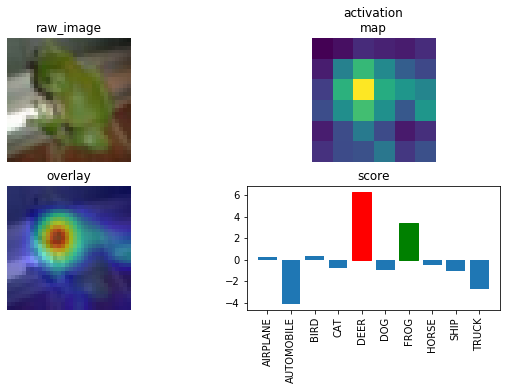

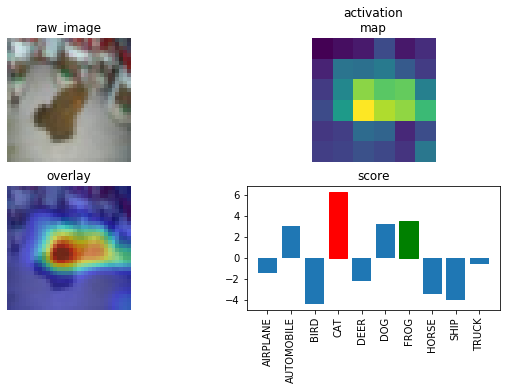

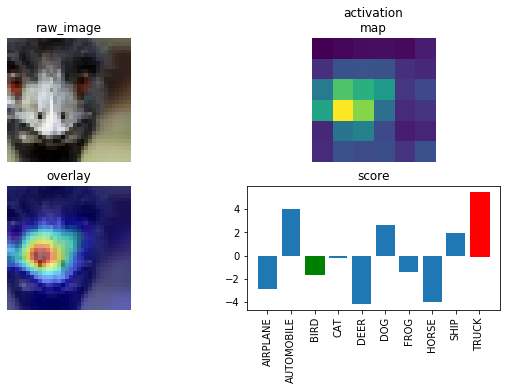

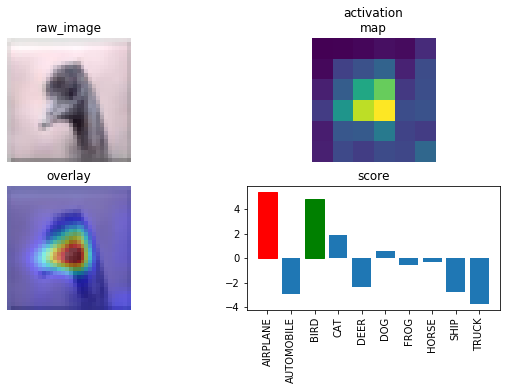

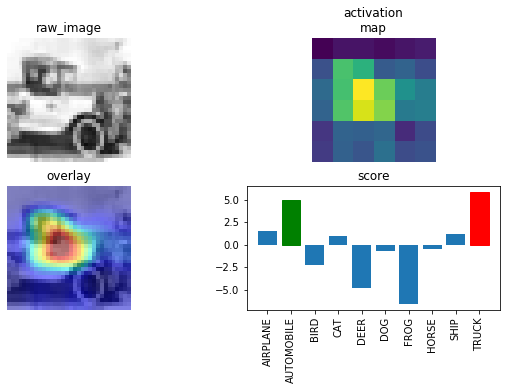

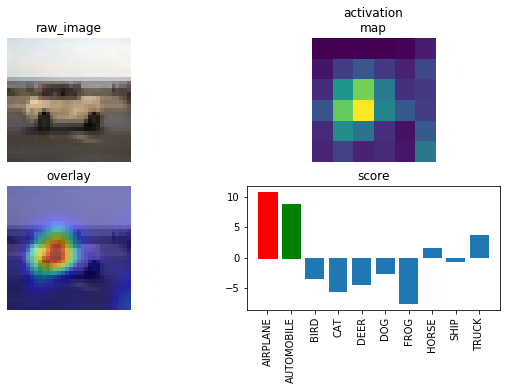

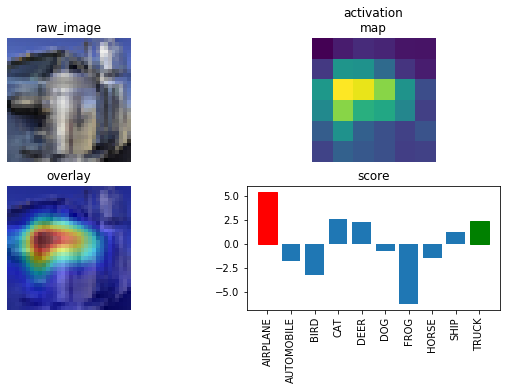

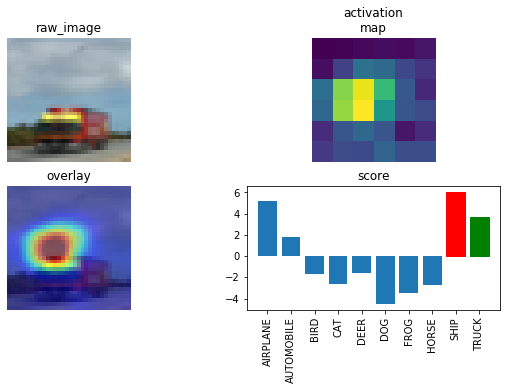

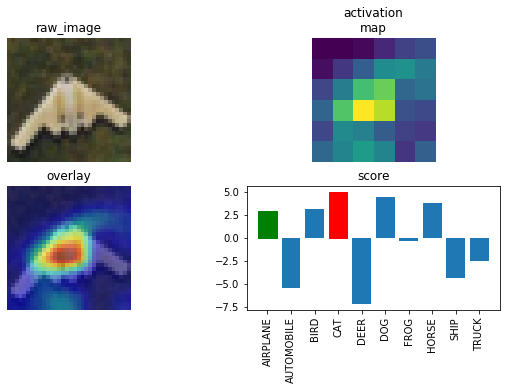

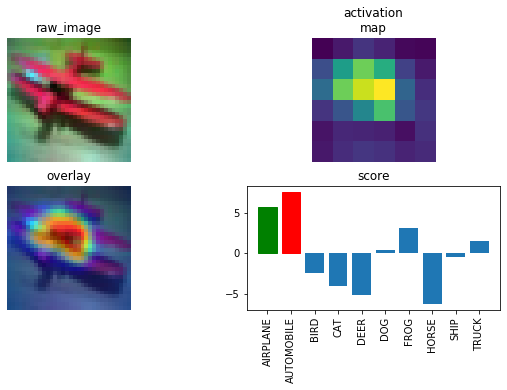

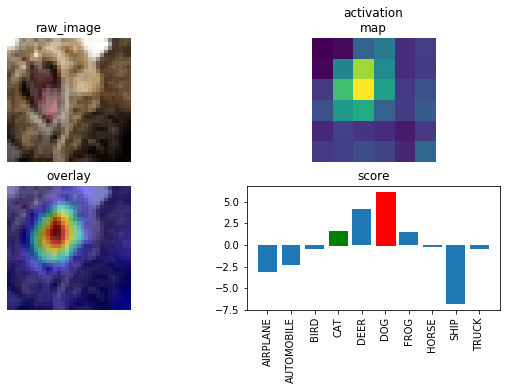

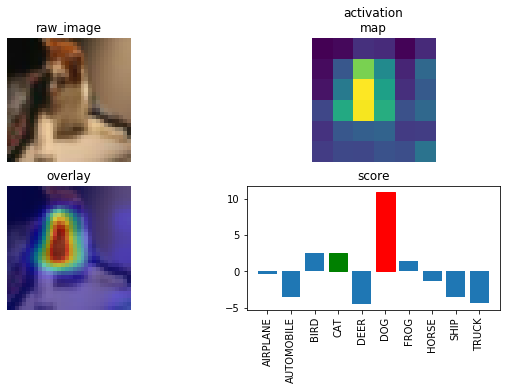

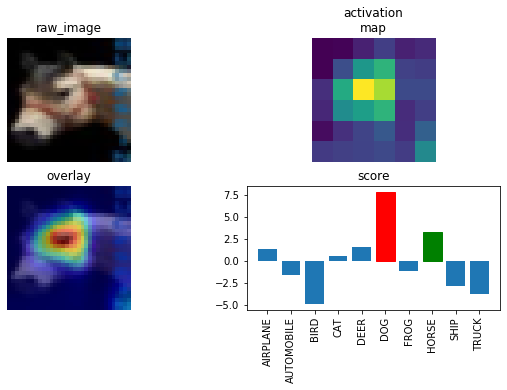

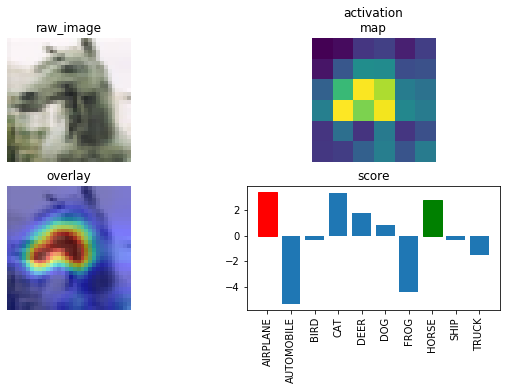

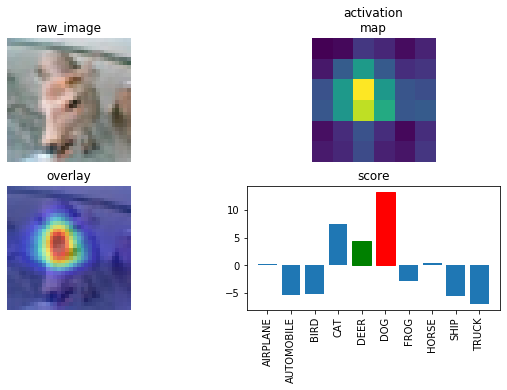

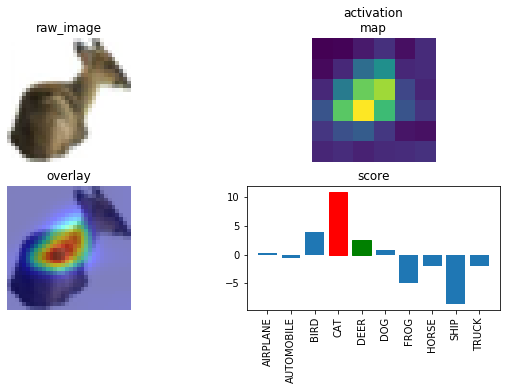

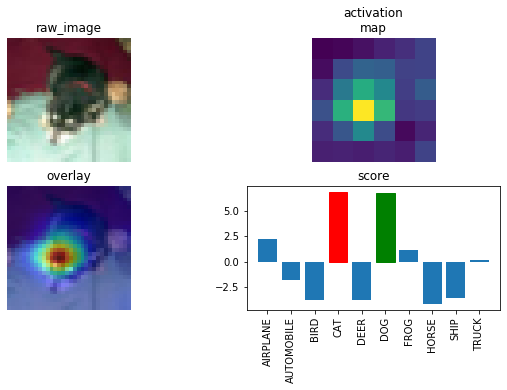

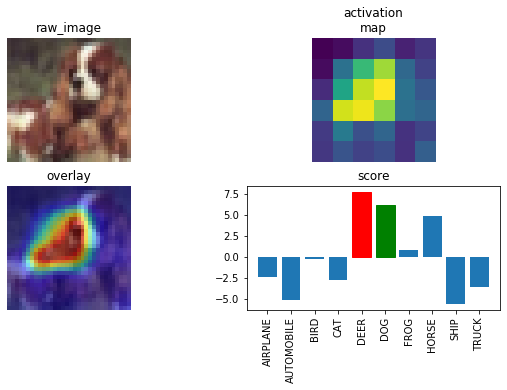

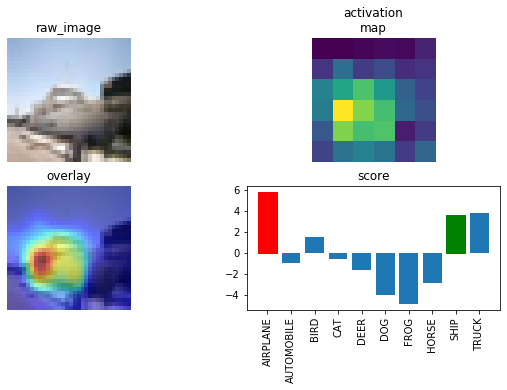

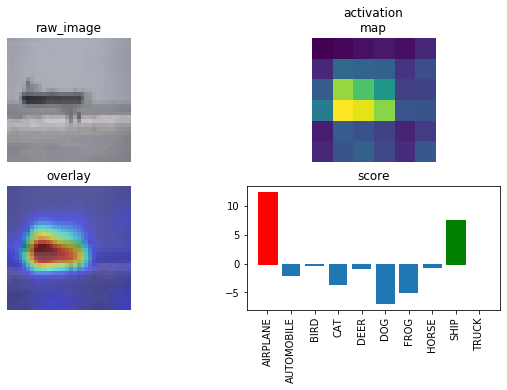

In [12]:
show_misclassification(trainer)